In [38]:
import gdal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

In [2]:
# - open file
file = gdal.Open ('514000_3519000.tif')

In [3]:
# - read in data (already cleaned - see Data_Cleaning.ipynb for data cleaning code)
data = file.ReadAsArray()

In [ ]:
print(data.shape)

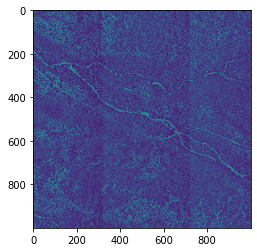

In [9]:
# - quick look at the data
plt.imshow(data[1,:,:])

In [14]:
# - reshape to get in correct dimensions for KMeans clustering algorithm
# - because we want to run the classification for all pixels using reflectance information
# - therefore, collapse rows and columns to 1-d array
data_reshaped =  data.reshape(data.shape[0],(-1))
print(data_reshaped.shape)

(360, 1000000)


In [20]:
# - We need to transpose the data to get them in the (n_samples, n_features) format for the KMeans clustering,
# - where n_sampleas is the number of observations (nrows X ncols) and n_features is the number of different types of
# - information - in this case the number of cleaned hyperspectral bands
data_t = np.transpose(data_reshaped)

In [22]:
# - check the shape
print(data_t.shape)

(1000000, 360)


In [24]:
# -
# - Create a KMeans model with 2 clusters: model
# -
model = KMeans(n_clusters=2)
# Use fit_predict to fit model and obtain cluster labels: labels
labels2 = model.fit_predict(data_t)
print(labels2.shape)

(1000000,)


In [26]:
# - reshape back to a 2d image
class2= labels2.reshape((data.shape[1],-1))
print(class2.shape)

(1000, 1000)


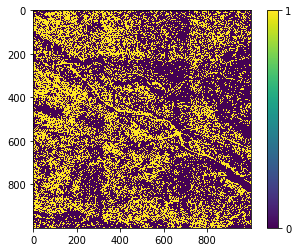

In [29]:
# - plot
plt.imshow(class2)
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()

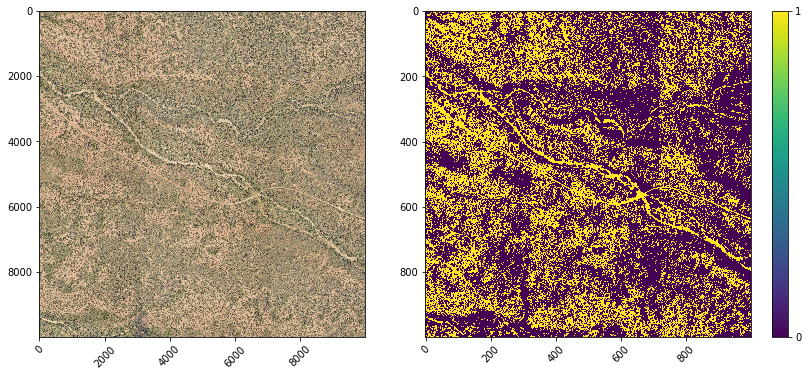

In [44]:
# - Comparison to camera image
fig=plt.figure(figsize=(12,10))
camIm = plt.imread('2018_SRER_2_514000_3519000_image.tif')
fig.add_subplot(2,2,1);
plt.imshow(camIm)
plt.xticks(rotation=45)
fig.add_subplot(2,2,2);
plt.imshow(class2)
plt.tight_layout()
plt.xticks(rotation=45)
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()

In [28]:
# -
# - Create a KMeans model with 3 clusters: model
# - 
model = KMeans(n_clusters=3)
# Use fit_predict to fit model and obtain cluster labels: labels
labels3 = model.fit_predict(data_t)
print(labels3.shape)

(1000000,)


In [47]:
# - reshape back to a 2d image
class3= labels3.reshape((data.shape[1],-1))
print(class3.shape)

(1000, 1000)


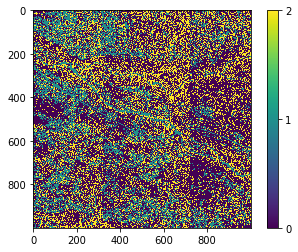

In [31]:
# - plot
plt.imshow(class3)
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()

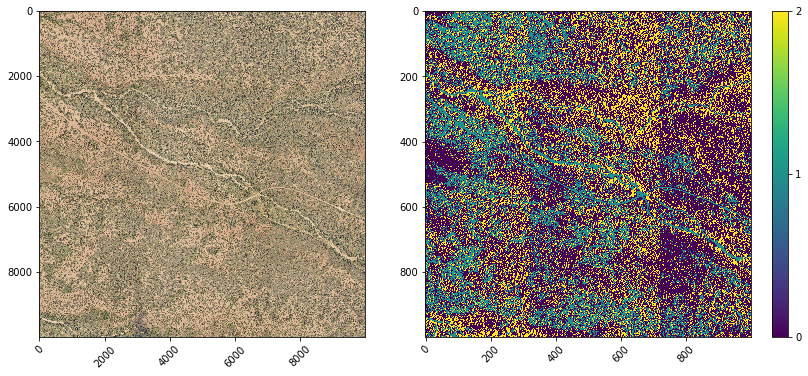

In [48]:
# - comparison with camera image
fig=plt.figure(figsize=(12,10))
camIm = plt.imread('2018_SRER_2_514000_3519000_image.tif')
fig.add_subplot(2,2,1);
plt.imshow(camIm)
plt.xticks(rotation=45)
fig.add_subplot(2,2,2);
plt.imshow(class3)
plt.tight_layout()
plt.xticks(rotation=45)
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()

In [32]:
# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters=4)
# Use fit_predict to fit model and obtain cluster labels: labels
labels4 = model.fit_predict(data_t)
print(labels4.shape)

(1000000,)


In [34]:
# - reshape back to a 2d image
class4= labels4.reshape((data.shape[1],-1))
print(class4.shape)

(1000, 1000)


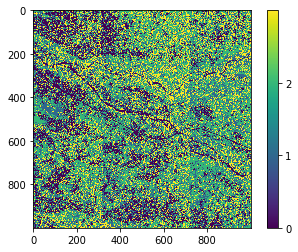

In [37]:
# - plot
plt.imshow(class4)
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()

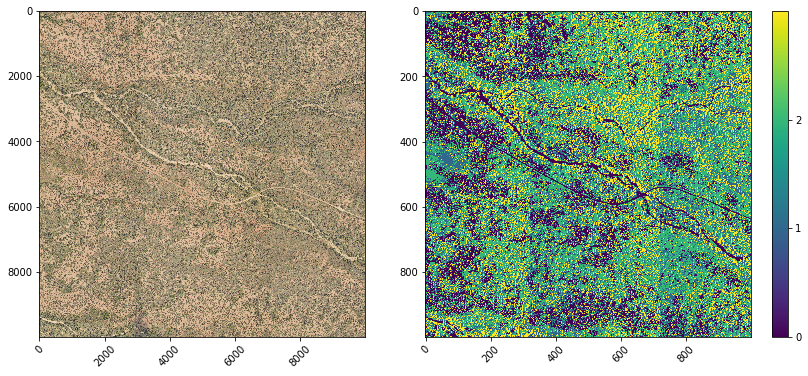

In [49]:
# - comparison with camera image
fig=plt.figure(figsize=(12,10))
camIm = plt.imread('2018_SRER_2_514000_3519000_image.tif')
fig.add_subplot(2,2,1);
plt.imshow(camIm)
plt.xticks(rotation=45)
fig.add_subplot(2,2,2);
plt.imshow(class4)
plt.tight_layout()
plt.xticks(rotation=45)
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()

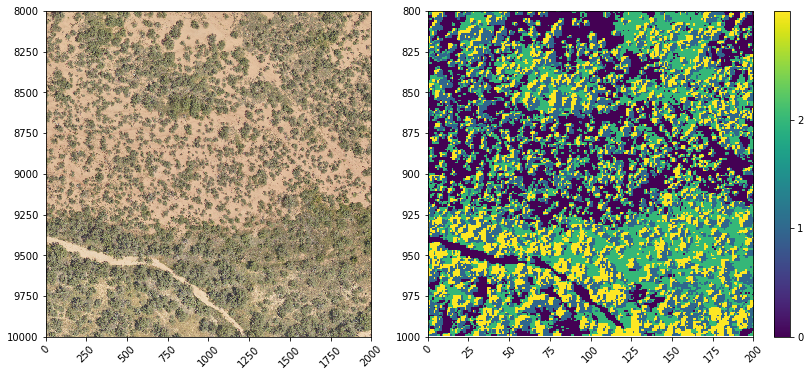

In [50]:
# - Zoomed in plotting to better see 4 clusters
fig=plt.figure(figsize=(12,10))
# camera image
camIm = plt.imread('2018_SRER_2_514000_3519000_image.tif')
fig.add_subplot(2,2,1);
plt.imshow(camIm)
plt.xticks(rotation=45)
plt.xlim(0,2000)
plt.ylim(10000,8000)
# classified image with four classes
fig.add_subplot(2,2,2);
plt.imshow(class4)
plt.tight_layout()
plt.xlim(0,200)
plt.ylim(1000,800)
plt.xticks(rotation=45)
plt.colorbar(ticks=np.linspace(-2,2,5))
plt.show()

Questions:

1. Which land cover/vegetation classes do you think each cluster corresponds to in your "2 cluster" classification?

ANSWER: Vegetation (cluster 0) and bare soil/ground/road (cluster 1).

2. Which land cover/vegetation classes do you think each cluster corresponds to in your "3 cluster" classification?

ANSWER: Low vegetation (cluster 0), bare soil (cluster 1) and shrubs (cluster 2).

3. Which land cover/vegetation classes do you think each cluster corresponds to in your "4 cluster" classification?

ANSWER: Bare soil (cluster 0), low vegetation such as grasses (cluster 2), clusters 1 and 3 are more ambiguous. At first glance it looks like it could be a mixture of shrubs and shrub shadow , but that separation doesn't always hold between the two clusters and the shadow class appears to occupy too many of the classified pixels.

4. Which number of clusters do you think is most appropriate for classifying the different cover types at this site?

ANSWER: The most unambiguous are the 2 and 3 cluster classifications - as we expected from the inertia exercise (see the powerpoint presentation). With the 4th cluster option it is not clear how to separate out clusters 1 and 3 - they do not clearly separate according to what we might expect or can see from the camera image. This might be because of information contained in the hyperspectral data that we cannot easily see in the image (possibly due to sun-viewer geometry and/or other elements such as moisture that change the reflectance of certain bands, but which we cannot see with the RGB information). In a "real-world" exercise, you may choose 2 or 3 clusters depending on the question you were asking, but you should be careful that your results are not biased towards the number of clusters you are hoping to find.